## 데이터 불러오기

In [29]:
from tabulate import tabulate
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import os

In [111]:
path_ko2en = 'C:/ff/AIhub/전문분야한영/Training/ko2en_training_csv'
paht_ko2en_social = 'C:/ff/AIhub/한국어-영어 번역 말뭉치(사회과학)/Training/학습데이터'
path_ko2en_xlsx = 'C:/ff/AIhub/한국어-영어 번역(병렬) 말뭉치'
path_ko2ja = 'C:/ff/AIhub/한국어-일본어 번역 말뭉치/Training/[원천]ko2ja_culture_training_csv'
path_ko2ch = 'C:/ff/AIhub/한국어-중국어 번역 말뭉치(사회과학)/Training/[원천]ko2zh_social_science_training_csv'

paths = [path_ko2en, paht_ko2en_social, path_ko2en_xlsx, path_ko2ja, path_ko2ch]

In [112]:
df_lng = pd.DataFrame({'src_lng':[], 'tgt_lng':[]})
df = pd.DataFrame({'src':[], 'tgt':[]})
for i, path in tqdm(enumerate(paths)):
    files = os.listdir(path)
    for file in files:
        save_path = os.path.join(path + '/' + file)
        src_key = ['한국어', 'ko','원문', '한국어', '한국어']
        tgt_key = ['영어', 'en', '번역문', '일본어', '중국어']
        
        
        if file.find('csv') != -1:
            tmp = pd.read_csv(save_path, encoding='utf-8')
            idx = np.random.randint(0, len(tmp), 200)
            
            temp = tmp.loc[idx]
            temp = temp.rename(columns={src_key[i]:'src', tgt_key[i]:'tgt'})
            temp = temp[['src', 'tgt']].reset_index(drop=True)
            
            lan_tmp = pd.DataFrame({'src_lng':src_key[i], 'tgt_lng':tgt_key[i]}, index=np.arange(len(temp)))
            df_lng = pd.concat([df_lng, lan_tmp], ignore_index=True)
            df = pd.concat([df, temp])
        else:
            try:
                tmp = pd.read_excel(save_path)
                idx = np.random.randint(0, len(tmp), 200)
                temp = tmp.loc[idx]
                temp.rename(columns={src_key[i]:'src', tgt_key[i]:'tgt'}, inplace=True)
                temp = temp[['src', 'tgt']].reset_index(drop=True)
                
                lan_tmp = pd.DataFrame({'src_lng':src_key[i], 'tgt_lng':tgt_key[i]}, index=np.arange(len(temp)))
                df_lng = pd.concat([df_lng, lan_tmp], ignore_index=True)
                df = pd.concat([df, temp])
            except:
                print(f'--{file} 형식임--')

0it [00:00, ?it/s]

--0730_social_train_set_895888.json 형식임--


c:\users\cpb06gamen\appdata\local\programs\python\python39\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\users\cpb06gamen\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [116]:
fin = pd.DataFrame(np.hstack((df, df_lng)))
fin.columns = ['src', 'tgt', 'src_lng', 'tgt_lng']
fin = fin[['src_lng', 'src', 'tgt', 'tgt_lng']]
fin.rename(columns={'src_lng':'src_L', 'tgt_lng':'tgt_L'}, inplace=True)

src_key = ['한국어', 'ko','원문', '한국어', '한국어']
tgt_key = ['영어', 'en', '번역문', '일본어', '중국어']

for i in range(5):
    fin.loc[fin['src_L'] == src_key[i], 'src_L'] = 'ko'
    if i <= 2:
        fin.loc[fin['tgt_L'] == tgt_key[i], 'tgt_L'] = 'en'
    elif i == 3:
        fin.loc[fin['tgt_L'] == tgt_key[i], 'tgt_L'] = 'ja'
    else:
        fin.loc[fin['tgt_L'] == tgt_key[i], 'tgt_L'] = 'zh'

In [117]:
# fin.to_csv('fin.csv', encoding='utf-8')

## 전처리

In [1]:
from tabulate import tabulate
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import os
import re
import collections
fin = pd.read_csv('fin.csv', encoding='utf-8')

In [117]:
eg = '아니 그게아니라 <진짜로> (멈춰!) -- 실화냐구 -- [띠용]'

# 소괄호 앞에는 \ 붙여야 함
# [^)]* 괄호 닫는 것을 제외하고 모든것
p = re.compile(r'(\([^)]*\))|(\<[^>]*\>)|(--[^-]*--)|(\[[^\]]*\])')
p.sub('', eg)

'아니 그게아니라    '

In [118]:
eg = 'self-confirmed, \u200b  \men\\ual/dismiss 4/5 / : 그렇;단 말이쥬 ; 아닌가욤 https://www.AIhub.com fire'

p = re.compile(r'(-|:|;|,|\\)|([^0-9]/)|(http[^ ]*)|(\u200b)')
p.sub('', eg)

'selfconfirmed   menuadismiss 4/5  그렇단 말이쥬  아닌가욤  fire'

In [233]:
# 부정형 후방탐색 ?<!  : 패턴과 일치하지 않으면 모두 repl (앞부터 검색)
# 부정형 전방탐색 ?!   : 패턴과 일치하지 않으면 모두 repl (뒤부터 검색)
# boundary \b
re.sub(r'\b(?<!%)\d+', ' 변경', '%42 544 11% 12%55') # boundary 중에서 % 뒤에 숫자가 아니면 repl한다
re.sub(r'\d+(?!%)\b', ' 변경', '%42 544 아뇨 11% 12%55') # 숫자 중에서 뒤에 %가 없으면 repl 한다

'%42  변경  변경%  변경%55'

In [260]:
tmp1 = re.sub(r'(?<!\S)', 'cha', '오  호라') # ' '가 아닌 것은 수정하지 않는다 + 공백과 boundary 뒤에 repl 추가 + 역방향(<)
tmp2 = re.sub(r'(?!\S)', 'cha', '오  호라') # ' '가 아닌 것은 수정하지 않는다 + 공백과 boundary 뒤에 repl 추가
tmp3 = re.sub(r'(?!\S)', 'cha', '오호라 하하') # ' '가 아닌 것(글자숫자)은 수정하지 않는다 +  공백과 boundary 뒤에 repl 추가
print(tmp1, '\n', tmp2, '\n', tmp3)

cha오 cha cha호라 
 오cha cha 호라cha 
 오호라cha 하하cha


### 정제

src와 tgt를 분리해서 BPE를 진행하기 위해 미리 데이터를 분리한다

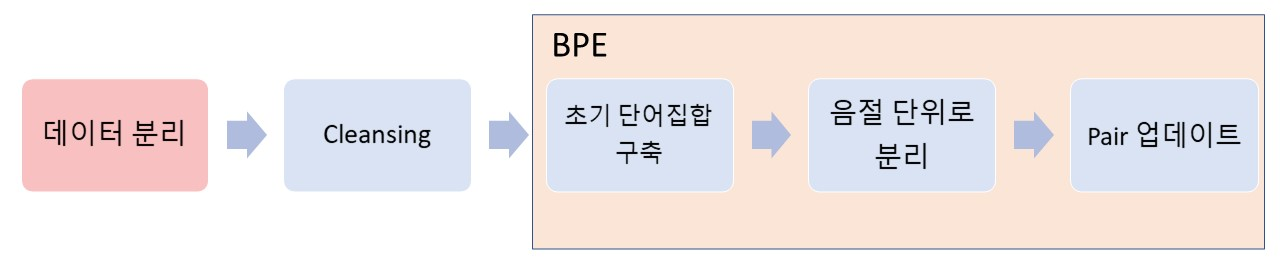

In [3]:
def src_tgt_split(df):
    '''
    1. tgt category 별로 데이터 프레임 생성
    > fin_en, fin_ja, fin_zh
    
    2. 한국어만 모은 Series 생성 (src)
    > fin_src_언어
    
    3. 외국어만 모은 Series 생성 (tgt)
    > fin_tgt_언어
    
    4. 문장 정제용 list 생성
    > clean_src_언어, clean_tgt_언어
    
    5. 
    '''
    names = set(fin.tgt_L)
    for name in names:
        globals()['fin_{}'.format(name)] = fin.loc[fin['tgt_L']==name].copy()
        globals()['fin_src_{}'.format(name)] = fin.loc[fin['tgt_L']==name]['src']
        globals()['fin_tgt_{}'.format(name)] = fin.loc[fin['tgt_L']==name]['tgt']
        globals()['clean_src_{}'.format(name)] = []
        globals()['clean_tgt_{}'.format(name)] = []
    return print('완료')

src_tgt_split(fin)

완료


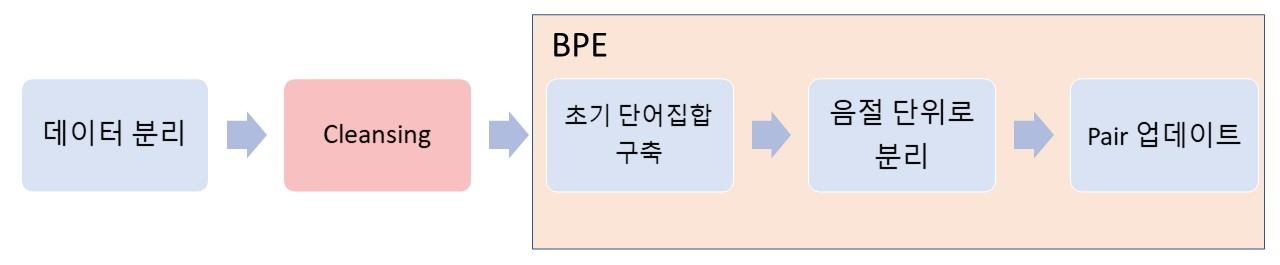

In [16]:
def clean_lng(sent):
    '''
    1. (), [], <>, -- -- 안에 내용 삭제
    3. 숫자 뒤 /는 포함, 숫자 뒤 :는 포함
    4. url 주소 삭제
    5. -, :, ;, ',', \, △, ㏊, ℓ, ▶, µ, ★, (, ), [, ], ▽, ♦,  •, \u200b 삭제
    6. ① ② ③ ④ ⑤ ⑥ ⑦ ⑧ ⑨ ⑩ 삭제
    '''
    if type(sent) == str:
        p = re.compile(r'(\([^)]*\))|(\<[^>]*\>)|(\[[^\]]*\])|(--[^-]*--)|([^0-9]/)|([^0-9]:)|(http[^ ]*)|(-|;|,|\\|△|㏊|ℓ|▶|µ|★|\(|\)|\[|\]|▽|♦|•|(\u200b))|(①|②|③|④|⑤|⑥|⑦|⑧|⑨|⑩)')
        res = p.sub('', sent)
    else:
        res = ''
    return res

# 문장 정제 실행 및 저장
def clean_sent(src_data, tgt_data, clean_src, clean_tgt):
    '''
    clean_lng를 실행하여 clean_src와 clean_tgt에 저장
    '''
    for sent_src, sent_tgt in zip(src_data, tgt_data):
        src = clean_lng(sent_src)
        tgt = clean_lng(sent_tgt)
        clean_src.append(src)
        clean_tgt.append(tgt)
    return print(f'src 문장 개수 :{len(clean_src)}, tgt 문장 개수 : {len(clean_tgt)}',
                 '\n', clean_src[5], '\n', clean_tgt[5], '\n')

In [17]:
clean_sent(fin_src_en, fin_tgt_en, clean_src_en, clean_tgt_en)
clean_sent(fin_src_ja, fin_tgt_ja, clean_src_ja, clean_tgt_ja)
clean_sent(fin_src_zh, fin_tgt_zh, clean_src_zh, clean_tgt_zh)

src 문장 개수 :25200, tgt 문장 개수 : 25200 
 항상 우리 학교 교육 활동에 관심을 가지고 아낌없이 지원해 주시는 학부모님께 깊은 감사의 말씀을 드립니다. 
 I would like to express my deep gratitude to parents who are always interested in and support our school's educational activities. 

src 문장 개수 :11200, tgt 문장 개수 : 11200 
 렉서스는 IS가 유로 NCAP 신차 안전 평가 프로그램에서 최고 등급인 별 다섯 개를 받았다고 10일 밝혔다. 
 レクサスは、ISがユーロNCAP新車安全評価プログラムで最高等級である5つ星をもらったと10日、明らかにした。 

src 문장 개수 :9800, tgt 문장 개수 : 9800 
 우리가 주고받는 전화나 메일은 다른 사람이 맘대로 보아서는 안 됩니다. 
 我们之间的电话或邮件不能随便让别人看。 



### Subword 분절 BPE

- BPE reference  
    1. Neural Machine Translation of Rare Words with Subword Units [Sennrich at el.2015]  
    2. Google’s Neural Machine Translation System: Bridging the Gap between Human and Machine Translation [Wo at el.2016]  
    3. https://rueki.tistory.com/13  
    4. https://lovit.github.io/nlp/2018/04/02/wpm/  
    5. https://an-seunghwan.github.io/nlp/Byte-Pair-Encoding-(2)/  

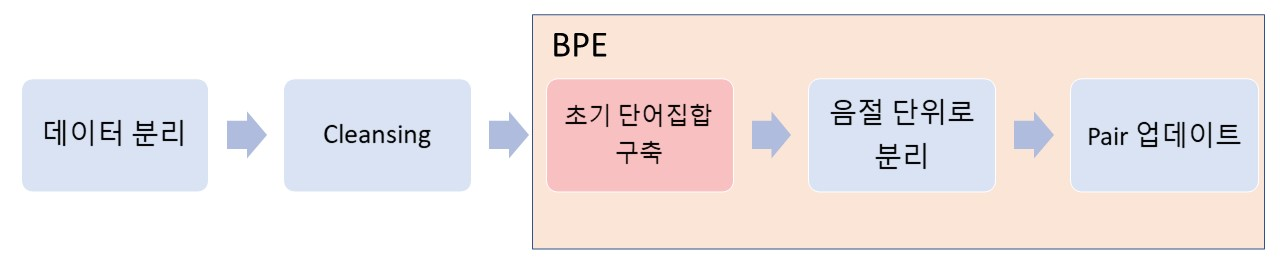

In [18]:
def init_vocab(corpus):
    '''
    BPE용 초기 단어집합 구축
    '''
    subwords = []
    for sent in corpus:
        tmp = [' '.join(word) + ' </w>' for word in sent.split()]
        subwords.extend(tmp)
    vocab = collections.Counter(subwords)
    return vocab

In [123]:
init_src_en, init_tgt_en = init_vocab(clean_src_en), init_vocab(clean_tgt_en)
init_src_ja, init_tgt_ja = init_vocab(clean_src_ja), init_vocab(clean_tgt_ja)
init_src_zh, init_tgt_zh = init_vocab(clean_src_zh), init_vocab(clean_tgt_zh)

In [124]:
import itertools

length = collections.Counter()
length.update(dict(itertools.islice(init_src_en.items(), 3)))
length

Counter({'청 소 년 기 의 </w>': 1, '음 주 는 </w>': 1, '다 양 한 </w>': 57})

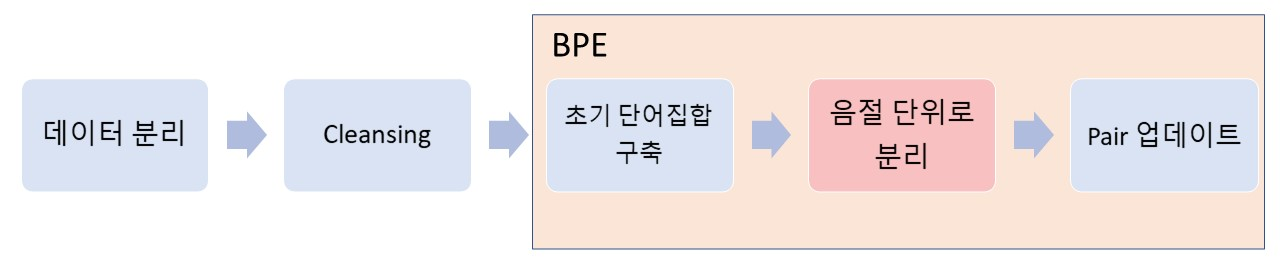

In [19]:
def vocab_segment(vocab):
    '''
    음절(또는 pair) 단위로 분리
    '''
    vocab_seg = set()
    for word in vocab.keys():
        symbol = word.split()
        vocab_seg.update(symbol)
    return list(vocab_seg)

def init_pair_freq(vocab):
    '''
    각 byte별 pair 빈도수 계산
    '''
    pairs = collections.defaultdict(int)
    for word, freq in vocab.items():
        symbol = word.split()
        
        # </w> 개수 제외
        for i in range(len(symbol)-1):
            pairs[symbol[i], symbol[i+1]] += freq
    return pairs

In [126]:
# 초기 음절 단어집합
sub_src_en, sub_tgt_en = vocab_segment(init_src_en), vocab_segment(init_tgt_en)
sub_src_ja, sub_tgt_ja = vocab_segment(init_src_ja), vocab_segment(init_tgt_ja)
sub_src_zh, sub_tgt_zh = vocab_segment(init_src_zh), vocab_segment(init_tgt_zh)

print('한-영 subword 단어집합 크기: {}, {}\n한-일 subword 단어집합 크기: {}, {}\n한-중 subword 단어집합 크기: {}, {}'.format(
    len(sub_src_en), len(sub_tgt_en), len(sub_src_ja), len(sub_tgt_ja), len(sub_src_zh), len(sub_tgt_zh)
))

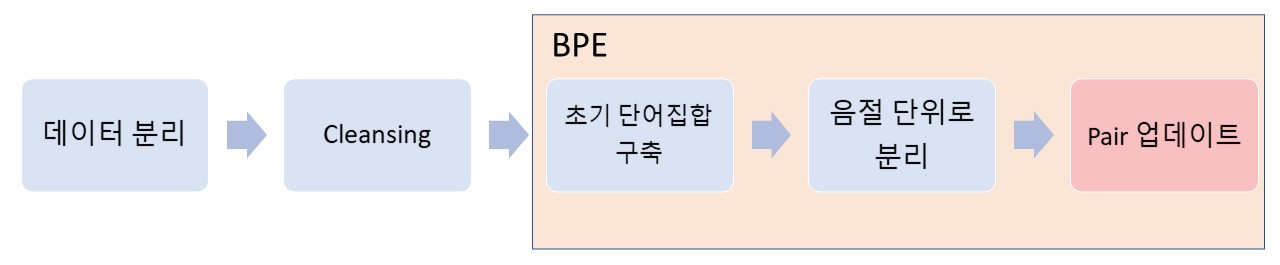

In [20]:
def merge_freq(pair, v_in):
    '''
    빈도수 기준으로 기존에 vocab update
    '''
    v_out = {}
    bigram = re.escape(' '.join(pair)) #특수문자들을 출력한다
    
    # bigram 앞뒤를 repl한다
    h = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
        # word가 '주 식 은 </w>'라면 pair가 '주식'일 때 '주식 은 </w>'으로 변한다
        w_out = h.sub(repl=''.join(pair), string=word)
        v_out[w_out] = v_in[word]
    return v_out

def merge_update(init_subword_set, max_merge_freq=10000):
    '''
    BPE 실행 함수
    '''
    for _ in tqdm(range(max_merge_freq)):
        pairs = init_pair_freq(init_subword_set)
        if len(pairs) == 0:
            break
        best = max(pairs, key=pairs.get) # 가장 높은 value의 key값을 반환
        init_subword_set = merge_freq(best, init_subword_set)
    return init_subword_set

### BPE 코드 실행

In [21]:
names = set(fin.tgt_L)
for name in names:
    fin_src = globals()['fin_src_{}'.format(name)]
    fin_tgt = globals()['fin_tgt_{}'.format(name)]
    
    globals()['clean_src_{}'.format(name)] = []
    globals()['clean_tgt_{}'.format(name)] = []
    clean_src = globals()['clean_src_{}'.format(name)]
    clean_tgt = globals()['clean_tgt_{}'.format(name)]
    clean_sent(fin_src, fin_tgt, clean_src, clean_tgt)
    
    globals()['init_src_{}'.format(name)] = init_vocab(clean_src)
    globals()['init_tgt_{}'.format(name)] = init_vocab(clean_tgt)
    init_src = globals()['init_src_{}'.format(name)]
    init_tgt = globals()['init_tgt_{}'.format(name)]
    
    globals()['merge_src_{}'.format(name)] = merge_update(init_src)
    globals()['merge_tgt_{}'.format(name)] = merge_update(init_tgt)
    merge_src = globals()['merge_src_{}'.format(name)]
    merge_tgt = globals()['merge_tgt_{}'.format(name)]
    
    globals()['vocab_src_{}'.format(name)] = vocab_segment(merge_src)
    globals()['vocab_tgt_{}'.format(name)] = vocab_segment(merge_tgt)

src 문장 개수 :1600, tgt 문장 개수 : 1600 
 렉서스는 IS가 유로 NCAP 신차 안전 평가 프로그램에서 최고 등급인 별 다섯 개를 받았다고 10일 밝혔다. 
 レクサスは、ISがユーロNCAP新車安全評価プログラムで最高等級である5つ星をもらったと10日、明らかにした。 



  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

src 문장 개수 :1400, tgt 문장 개수 : 1400 
 우리가 주고받는 전화나 메일은 다른 사람이 맘대로 보아서는 안 됩니다. 
 我们之间的电话或邮件不能随便让别人看。 



  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

src 문장 개수 :3600, tgt 문장 개수 : 3600 
 항상 우리 학교 교육 활동에 관심을 가지고 아낌없이 지원해 주시는 학부모님께 깊은 감사의 말씀을 드립니다. 
 I would like to express my deep gratitude to parents who are always interested in and support our school's educational activities. 



  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [81]:
for name in names:
    print(globals()['vocab_src_{}'.format(name)][:5], '\n', globals()['vocab_tgt_{}'.format(name)][:5])

['최종</w>', '창원시에</w>', '2007</w>', '바로', '건</w>'] 
 ['適用された', '割り当て', '転', 'CG', 'を得ない']
['쌍용차가</w>', '금융업계의</w>', '최종</w>', '노동계가</w>', '건</w>'] 
 ['可以在预算范围内', '赛和', '欢', '将随时通风换气、消毒校车准备好手部消毒剂。</w>', '审判论']
['활용에</w>', '9.', 'CG', '기존에는</w>', '최종</w>'] 
 ['9.', 'CG', 'applied</w>', 'individu', 'campsite</w>']


## nn.Embedding

In [53]:
for name in names:
    globals()['vcb_src_{}'.format(name)] = {word:i+2 for i, word in enumerate(globals()['vocab_src_{}'.format(name)]) if len(word) > 1}
    globals()['vcb_tgt_{}'.format(name)] = {word:i+2 for i, word in enumerate(globals()['vocab_tgt_{}'.format(name)]) if len(word) > 1}
    globals()['vcb_src_{}'.format(name)]['<unk>'] = 0
    globals()['vcb_src_{}'.format(name)]['<pad>'] = 1
    globals()['vcb_tgt_{}'.format(name)]['<unk>'] = 0
    globals()['vcb_tgt_{}'.format(name)]['<pad>'] = 1

In [ ]:
import torch.nn as nn
import torch

# Vocab과 데이터 엮기
def build_data(sentence, word2idx):
    encoded = [word2idx[token] for token in sentence]
    input_seq, label_seq = encoded[:-1], encoded[1:]
    input_seq = torch.LongTensor(input_seq).unsqueeze(0)
    label_seq = torch.LongTensor(label_seq).unsqueeze(0)
    return input_seq, label_seq

In [64]:
nn.Embedding(num_embeddings=len(vcb_src_en), embedding_dim=20)

Embedding(9764, 20)